# EDA for visualization

In [40]:
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy
import sklearn

SOURCE_PATH = "/Volumes/vault0/dataset3/chorus-22khz"
FEATURE_CSV_PATH = "./result_22000hz.csv"
TARGET = "10888.wav"

target = os.path.join(SOURCE_PATH, TARGET)

## Visualize one target

TARGET: 10888 (에픽하이 - 우산 (feat.윤하))

In [41]:
x, sr = librosa.load(target)

print(f"Length: {x.shape}, Sample Rate: {sr}")
ipd.Audio(target)

Length: (661500,), Sample Rate: 22050


### WavePlot

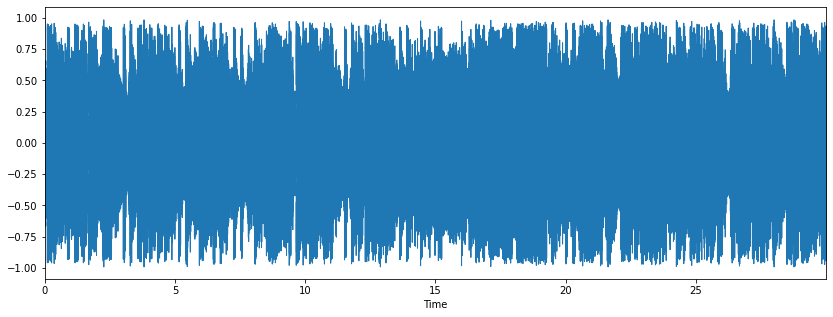

In [42]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram

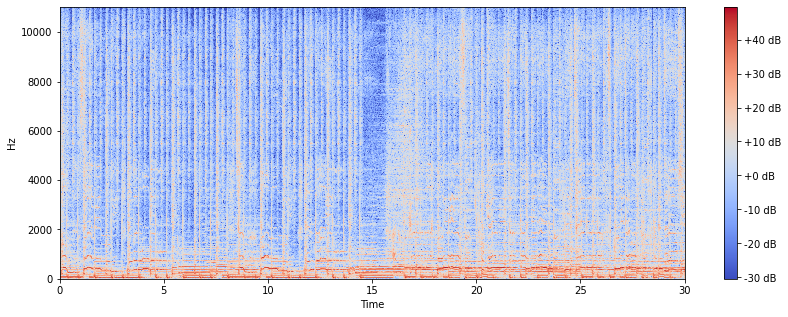

In [43]:
x_stft = librosa.stft(x)
x_db = librosa.amplitude_to_db(abs(x_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')

### RMSE (Root-square Minimum Energy)
$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

In [44]:
n_fft = 2048
frame_length = 512
hop_length = 256

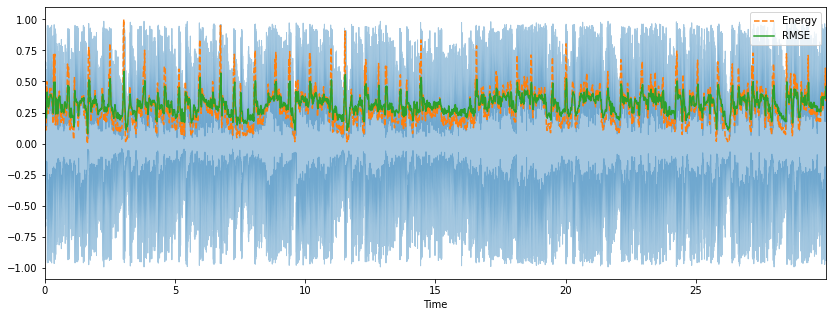

In [45]:
energy = numpy.array([
    sum(abs(x[i:i + frame_length] ** 2))
    for i in range(0, len(x), 256)
])
rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)[0]

t = librosa.frames_to_time(range(len(energy)), sr=sr, hop_length=hop_length)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, sklearn.preprocessing.minmax_scale(energy, axis=0), label="Energy", linestyle="dashed")
plt.plot(t, rmse, label="RMSE")
plt.legend()

## Zero Crossing Rate

Indicates the number of times that a signal crosses the horizontal axis.

Zero Crossing count: 55827


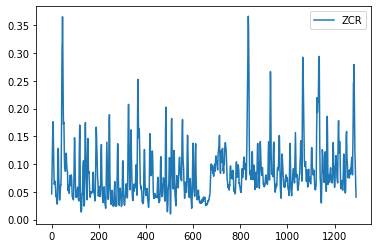

In [46]:
zero_crossings = librosa.zero_crossings(x, pad=False)
zcr = librosa.feature.zero_crossing_rate(x)
print("Zero Crossing count: "+str(sum(zero_crossings)))
plt.plot(zcr[0], label="ZCR")
plt.legend()

## Chroma

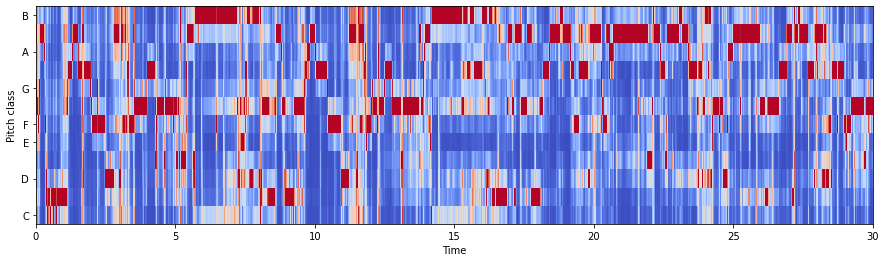

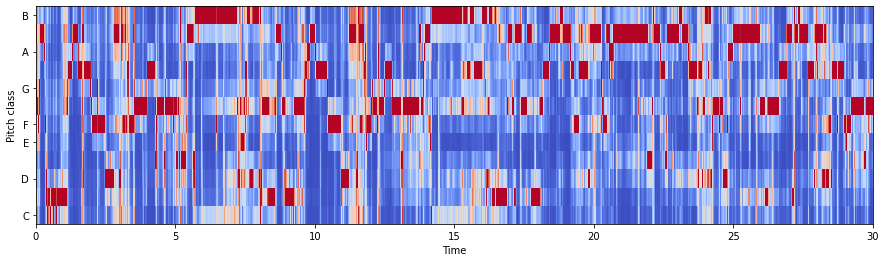

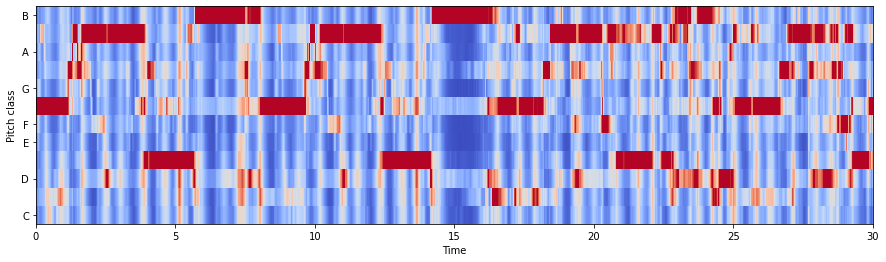

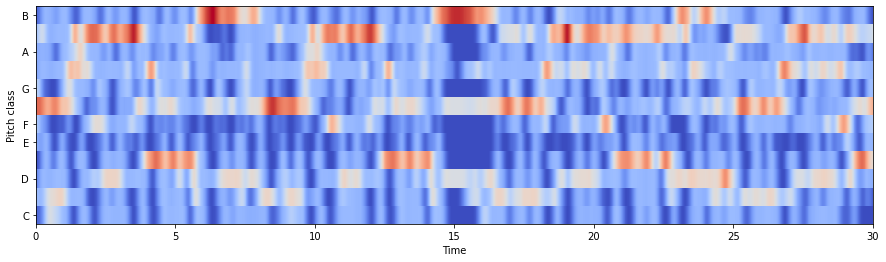

In [57]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
chroma_stft = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
chroma_cqt = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
chroma_cens = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_cens, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## MFCC (Mel Frequency Cepstral Coefficient)

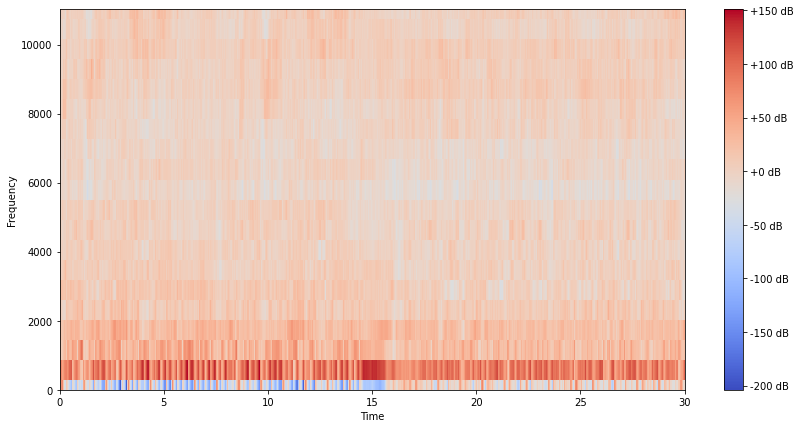

In [51]:
MFCCs = librosa.feature.mfcc(x,
                             sr = sr,
                             n_fft = n_fft,
                             hop_length = hop_length,
                             n_mfcc = 20)
plt.figure(figsize = (14,7))
librosa.display.specshow(MFCCs,
                         sr=sr,
                         hop_length=hop_length,
                         x_axis='time',y_axis="hz")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()